# Code 3
- Numerical & Categorical EDA
  - Outlier Detection and Basic Imputation (Mean/Median/Mode)
- Logistic Model (Balanced/ Unbalanced)

## 1/ Import Libraries

In [1]:
#CodeSection1
# from google.colab import drive
# drive.mount('/mntDrive') 

In [49]:
#CodeSection2
import pandas as pd
import numpy as np

## 2/ Import Data

In [50]:
#CodeSection3
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

## 3/ Combine both Datasets (train, test)

In [51]:
#CodeSection4
all_data = [train, test]

### Check Combined Data 
- Missing Value
- Data Types

In [52]:
#CodeSection5
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [53]:
#CodeSection6
# Check Data types for each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## 4/ EDA - Check Numerical Variables

In [54]:
#CodeSection7
# Lets Import the Seaborn Library
import seaborn as sns

### Lets start with Numerical Variable/Feature - 1

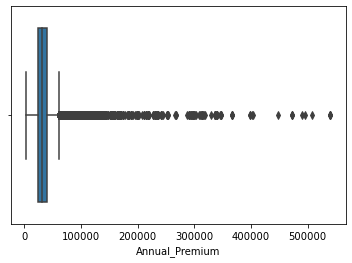

In [55]:
#CodeSection8
# in this case we start with "Annual_Premium"
sns.boxplot(train['Annual_Premium'])
# Has Outliers

### Inter Quantile Range Strategy 
- Outlier Detection
- Outlier Treatment

In [56]:
# #CodeSection9
# # Use quantile function
# # Find Q1 and Q3
# Q1 = train['Annual_Premium'].quantile(0.25)
# Q3 = train['Annual_Premium'].quantile(0.75)

# #Find IQR 
# IQR = Q3 - Q1

# #Find Lower Limit and Higher Limit
# Lower_Whisker = Q1 - 1.5*IQR
# Upper_Whisker = Q3 + 1.5*IQR

# # Print all Values
# print('Q1 : {}'.format(Q1))
# print('Q3 : {}'.format(Q3))
# print('IQR : {}'.format(IQR))
# print(Lower_Whisker, Upper_Whisker)

In [57]:
# #CodeSection10
# # Replace Variable with Upper Whisker (there are other strategies)
# train['Annual_Premium']=train['Annual_Premium'].apply(lambda x: Upper_Whisker if x> Upper_Whisker else x)

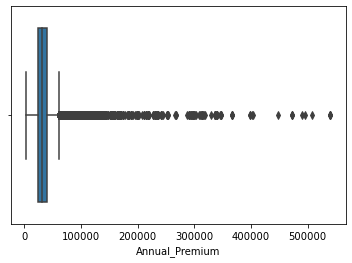

In [58]:
#CodeSection11
# Lets check again
sns.boxplot(train['Annual_Premium'])
# Now No Outliers

### Replicate for other Numerical Variable/Features

In [59]:
# #CodeSection12

# # Identify all Numerical Variables 
# numerical_features = ['Vintage','Age']

# #CodeSection9
# # Use quantile function
# # Find Q1 and Q3
# for num_var in numerical_features:
#     Q1 = train[num_var].quantile(0.25)
#     Q3 = train[num_var].quantile(0.75)

# #Find IQR 
#     IQR = Q3-Q1

# #Find Lower Limit and Higher Limit
#     Lower_Whisker = Q1 -1.5*IQR
#     Upper_Whisker = Q3 + 1.5*IQR
    
#     for datasets in all_data:
#         datasets[num_var]=datasets[num_var].apply(lambda x: Upper_Whisker if x> Upper_Whisker else x)

## With the imputation of outlier, accuracy is falling to 58 %.

## 7/ Now Re Check all Features

In [60]:
#CodeSection15
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

## 8/ Prepare Data for Model Model

In [61]:
#CodeSection16
# Check First 5 Rows of Test Data
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [62]:
#CodeSection17
# Get X and y Variables for your Dataset
X = train.drop(['id','Response'], axis =  1)
y = train['Response']

### Create Dummy Variables for  Categorical Variables

In [63]:
#CodeSection18
# Get Dummy Variables
X = pd.get_dummies(X)  # Keep only n - 1 Variables - Use "drop_first = True"

## 9/ Build Model

In [64]:
#CodeSection19
#Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression

#Initialize LR
clf = LogisticRegression(max_iter = 1000, class_weight='balanced')

In [65]:
#CodeSection20
# Fit Model
model = clf.fit(X, y)

### Check Accuracy of Model on Train Data

In [66]:
#CodeSection21
# Predict on Train Data
y_pred = model.predict(X)

### We can use a Accuracy Function from Metrics
- Check Train Accuracy

In [67]:
#CodeSection22
# Import metrics library
from sklearn.metrics import roc_auc_score

In [68]:
#CodeSection23
# get Actual "y" variables (use "y_true" as variable)
y_true = train['Response']

In [69]:
#CodeSection24
# Print Train Accuracy
print(f" Train Accuracy : {roc_auc_score(y_true, y_pred):0.1%}")

 Train Accuracy : 78.1%


## 10/ Predict and Submit

### Predict

In [70]:
#CodeSection25
# Get all the X Variables from the Test Dataset
X_test = test.drop(['id'], axis =  1)

In [71]:
#CodeSection26
#Covert to Dummies
X_test = pd.get_dummies(X_test)

In [72]:
#CodeSection28
# Predict on X_test Data ("X_test_prep")
X_test_prep = model.predict(X_test)

### Import Sample Submission

In [73]:
#CodeSection29
sample_submission = pd.read_csv('input/sample_submission.csv')
sample_submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


### Create Submission File

In [74]:
#CodeSection24
submission = pd.DataFrame({
    'id' : test['id'],
    'Response' : X_test_prep
})

### Export Submission File

In [75]:
#CodeSection31
submission.to_csv('output/O3_LR_Outlier.csv', index = False)

In [76]:
# LB Accuracy :  0.7827195214834443